<a href="https://colab.research.google.com/github/SinghLavanya/Healthcare_Insurance/blob/main/US_Health_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/content/insurance (1).csv')

In [ ]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Check for th enull values

In [ ]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Converting categorigal values into numerical


In [ ]:
df=pd.get_dummies(df, columns=['sex', 'smoker','region'])

In [ ]:
print(df.head())

   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400        True     False      False   
1   18  33.770         1   1725.55230       False      True       True   
2   28  33.000         3   4449.46200       False      True       True   
3   33  22.705         0  21984.47061       False      True       True   
4   32  28.880         0   3866.85520       False      True       True   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0        True             False             False             False   
1       False             False             False              True   
2       False             False             False              True   
3       False             False              True             False   
4       False             False              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             False  
4             Fals

In [ ]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Select numeric columns to normalize
columns_to_normalize = ['age', 'bmi', 'children', 'charges']

# Apply Min-Max Scaling (values will be between 0 and 1)
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display first few rows after normalization
print(df.head())


        age       bmi  children   charges  sex_female  sex_male  smoker_no  \
0  0.021739  0.321227       0.0  0.251611        True     False      False   
1  0.000000  0.479150       0.2  0.009636       False      True       True   
2  0.217391  0.458434       0.6  0.053115       False      True       True   
3  0.326087  0.181464       0.0  0.333010       False      True       True   
4  0.304348  0.347592       0.0  0.043816       False      True       True   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0        True             False             False             False   
1       False             False             False              True   
2       False             False             False              True   
3       False             False              True             False   
4       False             False              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             Fa

In [ ]:
# Check if any negative values exist
print("Negative values exist?", (df[columns_to_normalize] < 0).any().any())

# Check if any NaN values exist
print("Missing values exist?", df.isnull().sum().sum())

# Display summary statistics to confirm data is between 0 and 1
print(df.describe())


Negative values exist? False
Missing values exist? 0
               age          bmi     children      charges
count  1338.000000  1338.000000  1338.000000  1338.000000
mean      0.461022     0.395572     0.218984     0.193916
std       0.305434     0.164062     0.241099     0.193301
min       0.000000     0.000000     0.000000     0.000000
25%       0.195652     0.278080     0.000000     0.057757
50%       0.456522     0.388485     0.200000     0.131849
75%       0.717391     0.504002     0.400000     0.247700
max       1.000000     1.000000     1.000000     1.000000


In [ ]:
df.to_csv('preprocessed_healthcare_data.csv', index=False)

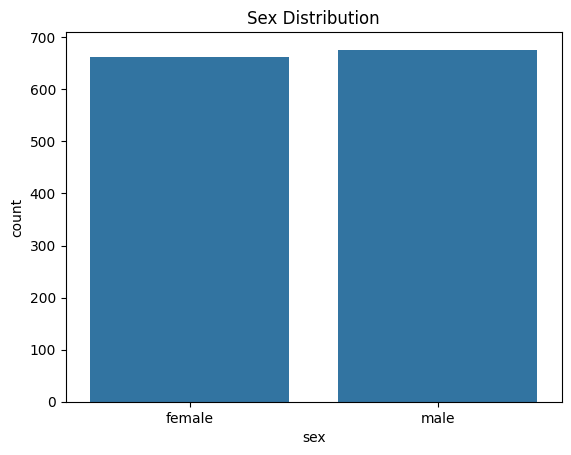

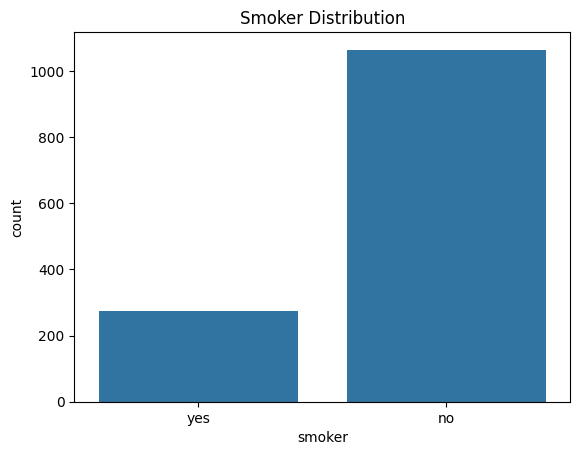

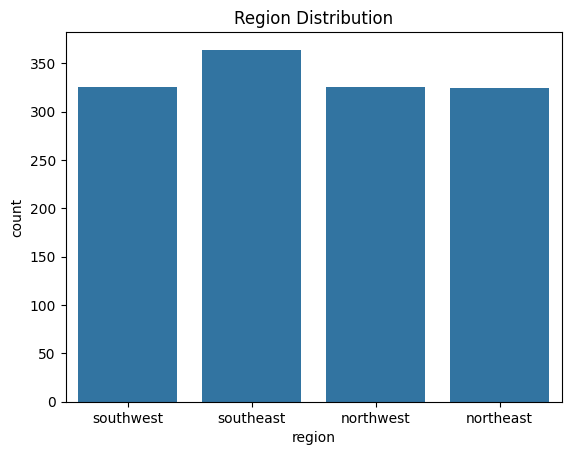

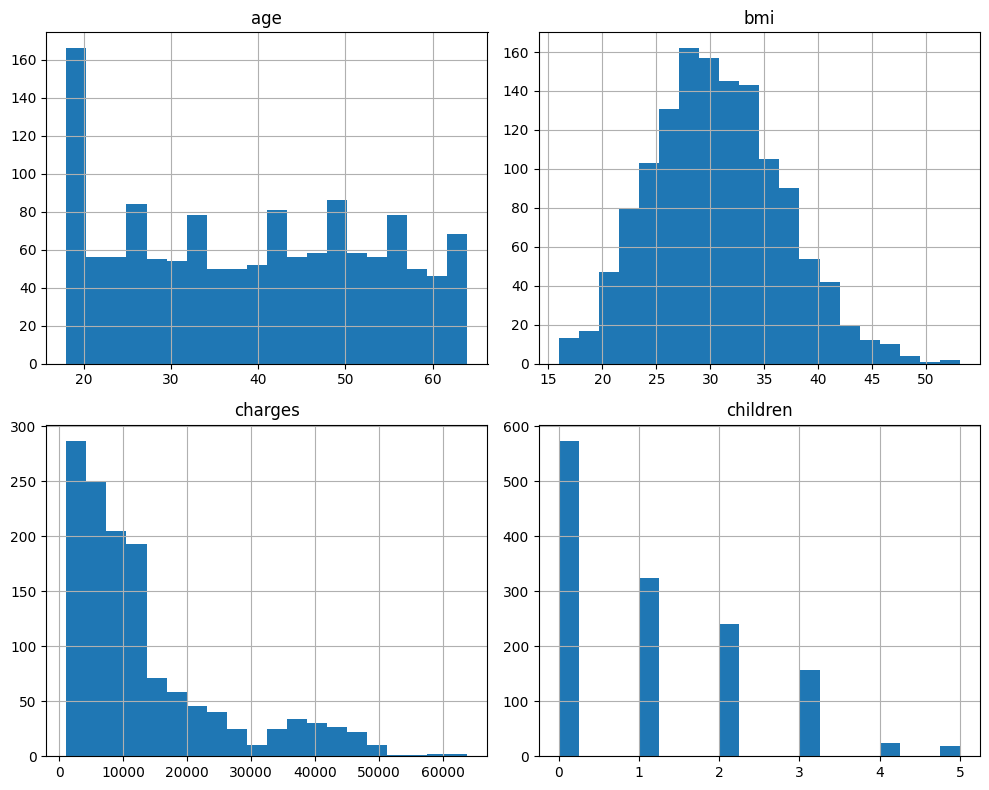

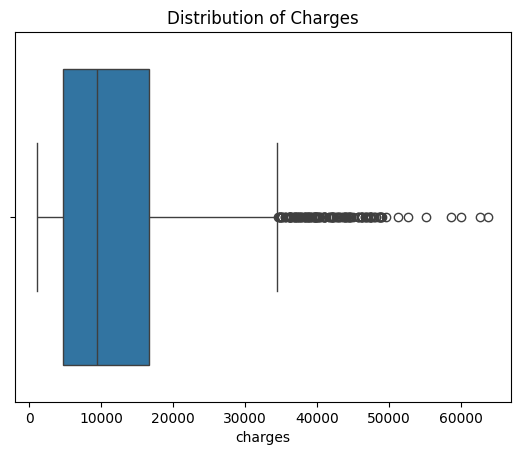

In [3]:
# Bar plots
sns.countplot(data=df, x='sex')
plt.title("Sex Distribution")
plt.show()

sns.countplot(data=df, x='smoker')
plt.title("Smoker Distribution")
plt.show()

sns.countplot(data=df, x='region')
plt.title("Region Distribution")
plt.show()

# Histograms
df[['age', 'bmi', 'charges', 'children']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()



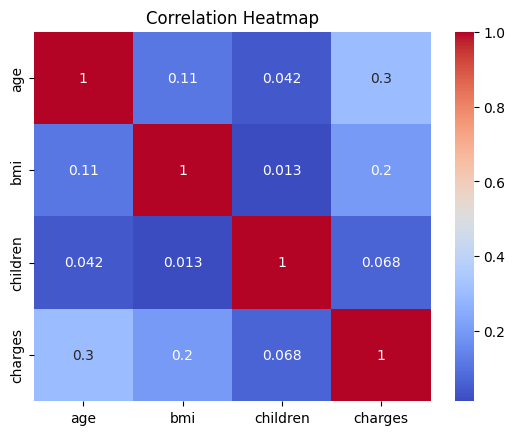

In [4]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


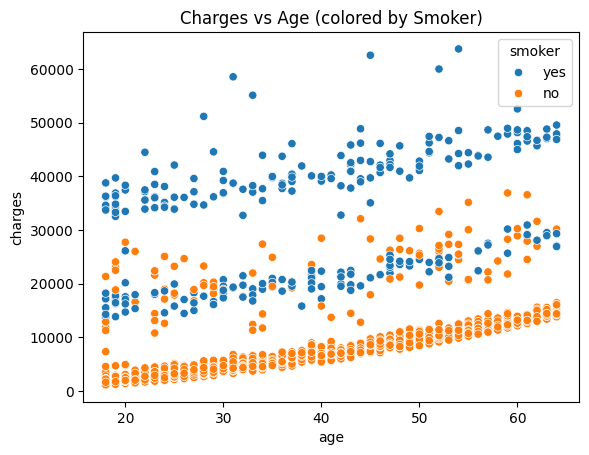

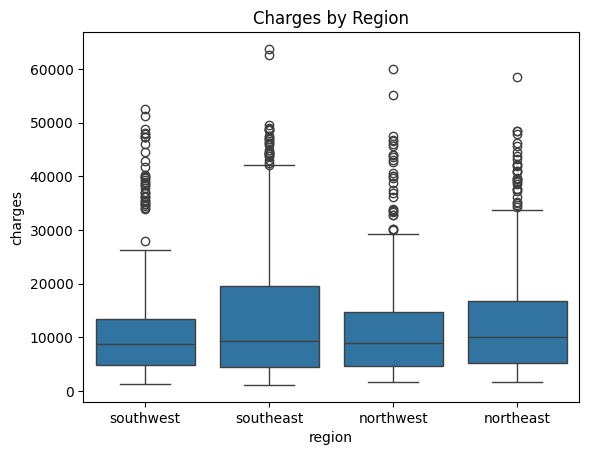

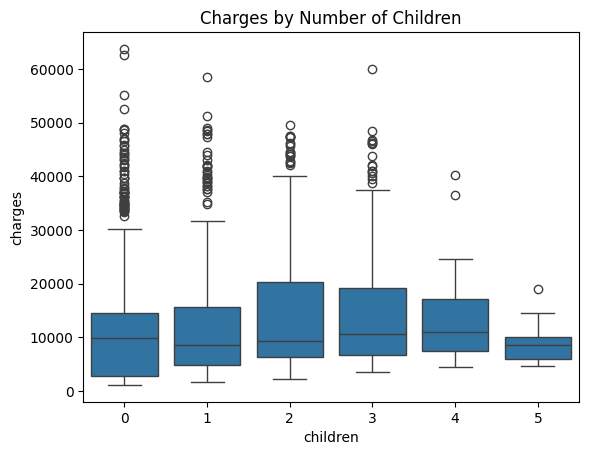

In [5]:
# Charges vs. age
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title("Charges vs Age (colored by Smoker)")
plt.show()

# Charges by region
sns.boxplot(data=df, x='region', y='charges')
plt.title("Charges by Region")
plt.show()

# Charges by number of children
sns.boxplot(data=df, x='children', y='charges')
plt.title("Charges by Number of Children")
plt.show()


In [7]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Linear Regression R2: 0.7835929767120724
Random Forest R2: 0.8651034329144947


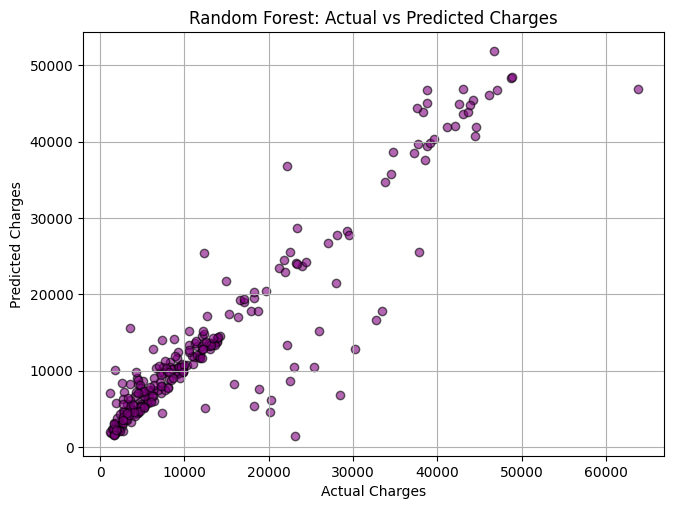

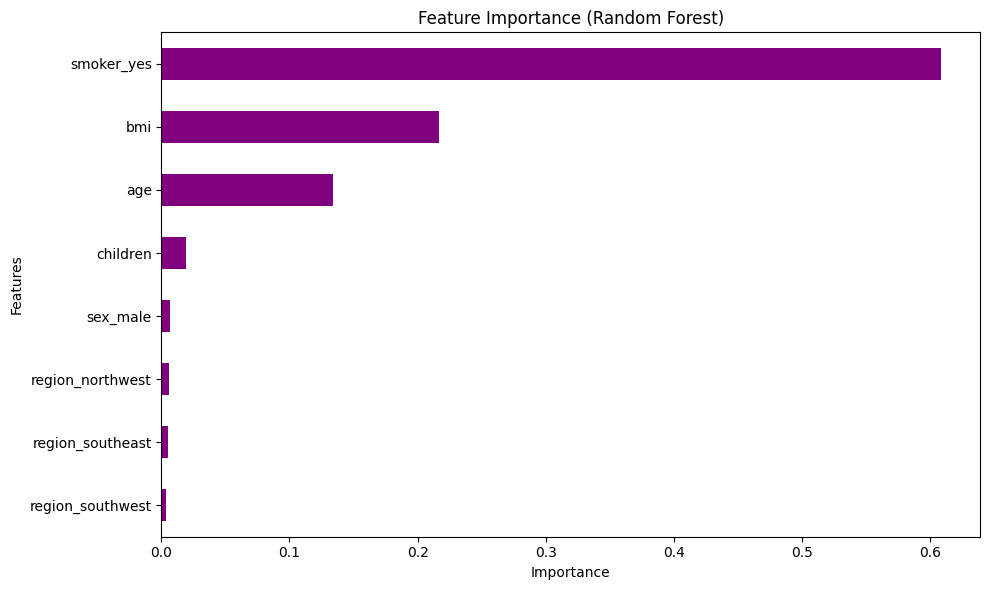

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_test and y_pred_rf are already defined from model prediction
plt.figure(figsize=(7.5, 5.5))
plt.scatter(y_test, y_pred_rf, color='purple', alpha=0.6, edgecolors='k')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Random Forest: Actual vs Predicted Charges")
plt.grid(True)
plt.show()

# Feature importance (unchanged but included for completeness)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), color='purple')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
